<a href="https://colab.research.google.com/github/onishiryo/RK2test1/blob/main/RK2_freefall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
'''
connect to google drive
'''
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import os

## 小さい物体がゆっくりと動く場合には（つまり、Reynolds数が小さい場合には）、物体に働く効力は速度に比例する。
２次元で考えると、x,y方向の運動は次のように記述される：
$$
\left\{
\begin{array}{lcl}
    \frac{dx}{dt} &=& u \\
    \frac{dy}{dt} &=& v
\end{array}
\right.
$$
$$
\left\{
\begin{array}{lcl}
    m\frac{du}{dt} &=& -ku \\
    m\frac{dv}{dt} &=& -kv - mg
\end{array}
\right.
$$
## 参考：Reynolds数が大きい場合には、物体に働く効力は速度の２乗に比例する。

In [5]:
def RK2(t, u0,v0):
    # integration with 2nd-order Runge-Kutta method
    #
    g=9.8 # gravitational acceleration [m/s2]
    k=0.1 # coefficient for drag [-]
    m=1.0 # mass [kg]

    nstep= len(t)
    dt= t[1]-t[0] # time interval, dt [s]
    xt, yt= np.zeros([nstep]), np.zeros([nstep]) # zero set
    xt[0], yt[0] = 0.0, 0.0 # (x0,y0)=(0,0)

    u=u0; v=v0
    for n in range(nstep-1): # 0,1,2,,,nstep-2
      #RK first step
        dxdt=u
        dydt=v
        dudt=-(k/m)*u
        dvdt=-(k/m)*v-g
        #integration
        xtm = xt[n] +dxdt*dt*0.5
        ytm = yt[n] +dydt*dt*0.5
        um = u +dudt*dt*0.5
        vm = v +dvdt*dt*0.5
      #RK second step
        dxdt=um
        dydt=vm
        dudt=-(k/m)*um
        dvdt=-(k/m)*vm-g
        #integration
        xt[n+1]= xt[n] +dxdt*dt        
        yt[n+1]= yt[n] +dydt*dt        
        u = u +dudt*dt
        v = v +dvdt*dt
    #
    print("final n =",n)
    return xt,yt

In [6]:
# Set initial velocities [m/s]
u0= 10.0; v0= 30.0

print("initial velocities(u0,v0) =",u0,v0)

initial velocities(u0,v0) = 10.0 30.0


In [18]:
# time setting
Tend= 5.0               # end time [s]
dt= 1.0e-4              # time interval [s]
nstep= int(Tend/dt+0.5) # number of time steps     
t= np.arange(0, nstep, 1)*dt # t[0:nstep-1]
print("Tend = ",Tend)
print("number of steps = ",nstep)

Tend =  5.0
number of steps =  50000


In [19]:
# calculate temporal evolution of position
xt,yt = RK2(t, u0,v0)
print("RK2 solved!")
print("final position is (",xt[nstep-1],",",yt[nstep-1],").")

final n = 49998
RK2 solved!
final position is ( 39.346327494539295 , 13.64279193009754 ).


dt=1 final position is ( 32.919804937500004 , 29.373503199999995 ).

dt=0.1 final position is ( 38.73685650058384 , 15.63176320747324 ).

dt=0.01 final position is ( 39.28624557297211 , 13.843943334043297 ).

dt=0.001 final position is ( 39.34086836832114 , 13.66111511451056 ).

dt=0.0001 final position is ( 39.346327494539295 , 13.64279193009754 ).

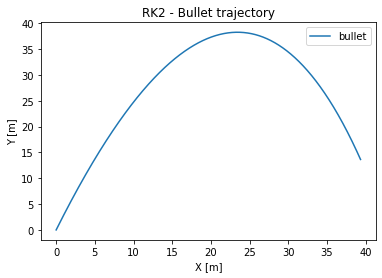

In [34]:
import matplotlib.pyplot as plt
# make 2D Plot
fig = plt.figure()

plt.title('RK2 - Bullet trajectory')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.plot(xt, yt, linestyle = 'solid', label = 'bullet')
plt.legend(loc = "upper right")

#（例）a[::5] 配列aから5個に一つずつ取り出す
#plt.plot(xt[::10], yt[::10], 'o') 

plt.show()

fig.savefig("bullet.png")

# ToDoリスト
- [ ] <**ToDo-1**> 1秒ごとに●マーカーを描こう。
- [ ] <**ToDo-2**> 初期速度を(u0,v0)=(10,10)の場合を描こう。
- [ ] <**ToDo-3**> 抵抗が速度の２乗に比例する場合を描こう。
- [ ] <**ToDo-4**> 抵抗係数を0にした場合を描こう。
- [ ] <**ToDo-5**> 異なる二つの軌跡を一つのグラフに描こう。
- [ ] <**ToDo**> 上記のpngファイルを保存しよう（→レポート提出）。
- [ ] <**ToDo-extra**> dtを変化させ(dt=1,0.1,0.01,0.001,0.0001)、final positionの変化を確認しよう。


In [32]:
a=1

In [29]:
a=a*100

In [31]:
print("a=",a)

a= 110


In [30]:
a=a+10